In [1]:
from sklearn import datasets
import pandas as pd
%matplotlib inline

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=44)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
mlp = MLPClassifier(max_iter=1000, random_state=10)

In [11]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))

Accuracy on training set: 1.00


In [13]:
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on test set: 0.98


In [14]:
import matplotlib.pyplot as plt

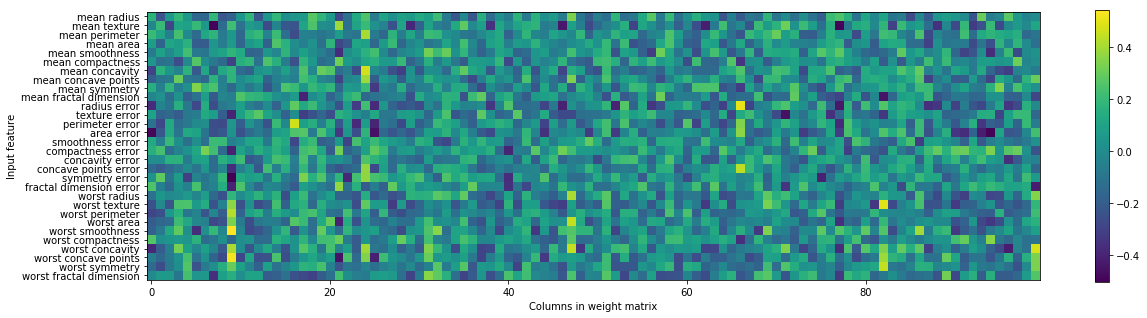

In [15]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()